# Explore here

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
datos = pd.read_csv(url)  # No necesitas especificar el separador, ya que por defecto es ","

# Mostrar las primeras filas de los datos
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
datos.shape

(1338, 7)

In [108]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [89]:
datos.duplicated().sum()

np.int64(1)

In [109]:
data_limpia = datos.drop_duplicates()
print(data_limpia.shape)
data_limpia.head()

(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [110]:
num_cols = data_limpia.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data_limpia.select_dtypes(include=['object',"category"]).columns

print(num_cols)
print(cat_cols)


Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


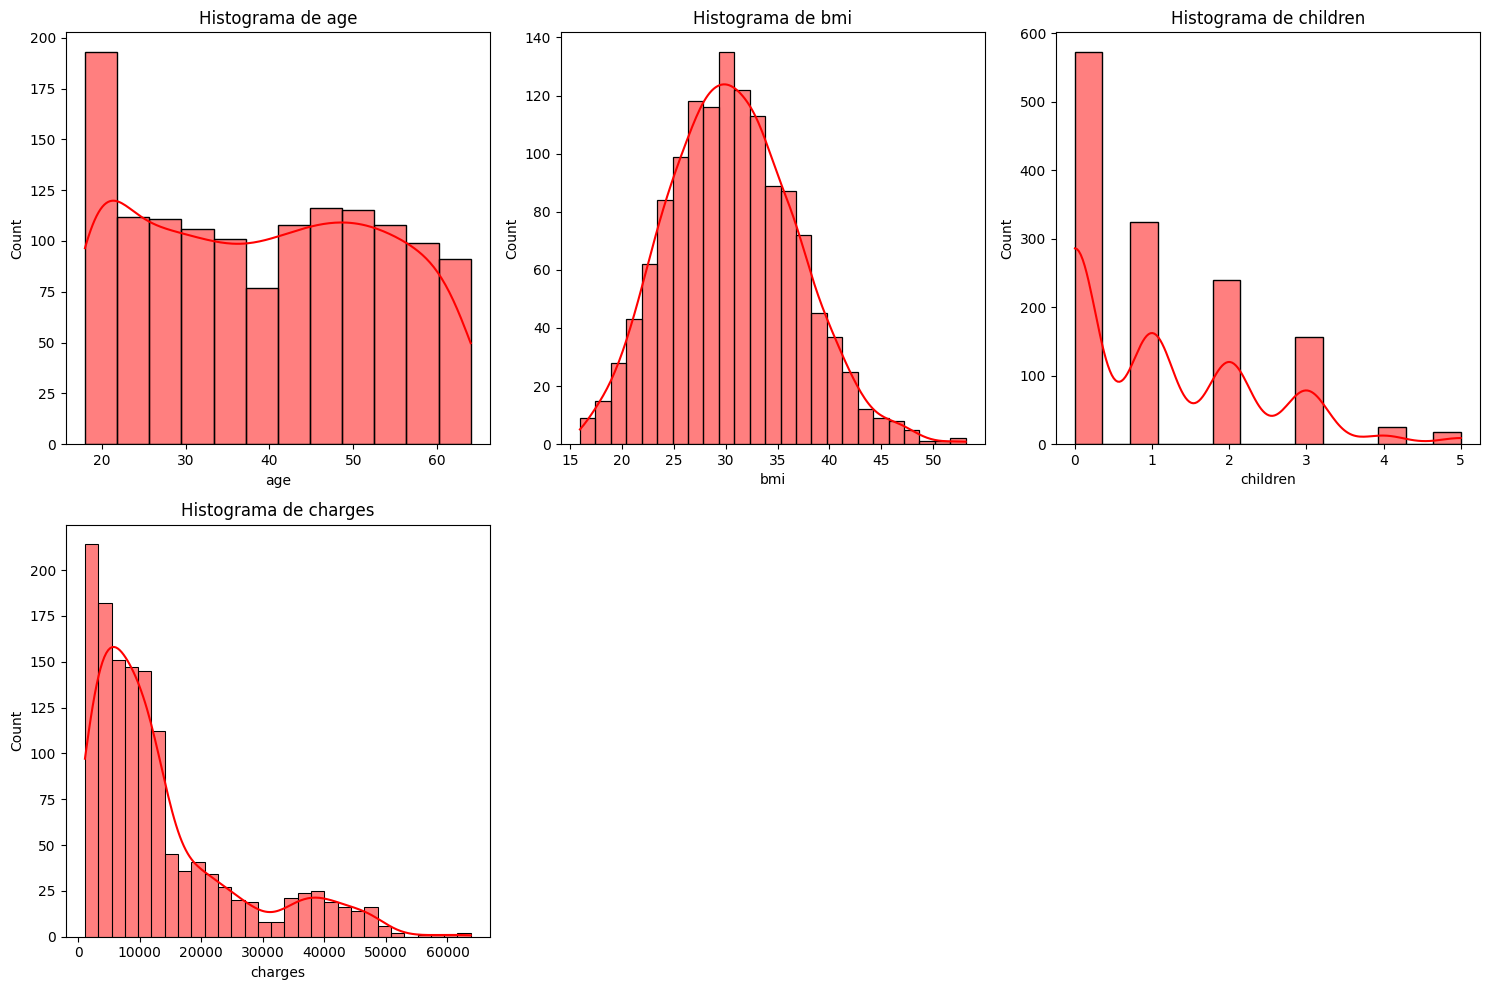

In [113]:
#HISTOGRAMA VARIABLES NUMERICAS

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Usar la variable ya definida num_cols
columns = num_cols

# Fijar el número de columnas por fila a 3
cols_per_row = 3

# Calcular el número de filas necesarias
num_rows = math.ceil(len(columns) / cols_per_row)

# Crear la figura con subgráficos (axes) y un tamaño más grande
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

# Asegurarse de que 'axes' sea una lista bidimensional
axes = axes.reshape(num_rows, cols_per_row) if num_rows > 1 else [axes]

# Generar los gráficos (histogramas)
col_index = 0
for row in range(num_rows):
    for col in range(cols_per_row):
        if col_index < len(columns):
            sns.histplot(data=data_limpia, x=columns[col_index], kde=True, ax=axes[row][col], color="red")
            axes[row][col].set_title(f"Histograma de {columns[col_index]}")
            col_index += 1
        else:
            # Ocultar los ejes vacíos en lugar de eliminarlos
            axes[row][col].axis("off")  # Desactivar los ejes vacíos

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

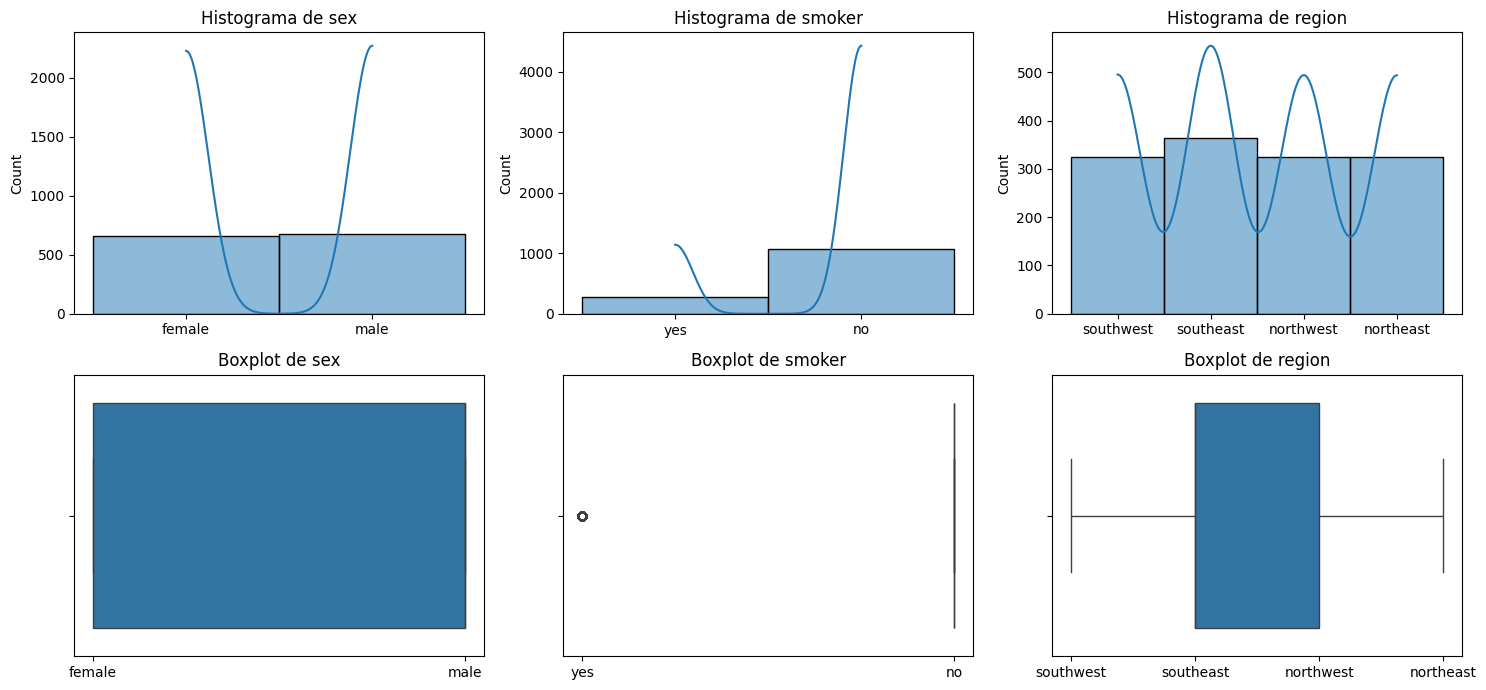

In [112]:
def graficar_categoricas(df, columnas):
   
    n = len(columnas)  
    n_columnas = 3 
    n_filas = 2
    
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(15, 7))
    
    axis = axis.flatten()

    for i, col in enumerate(columnas):
        sns.histplot(df[col], bins=30, kde=True, ax=axis[i]).set(xlabel=None)
        axis[i].set_title(f'Histograma de {col}')
                
        sns.boxplot(data=df, x=col, ax=axis[i + n_columnas]).set(xlabel=None)
        axis[i + n_columnas].set_title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()

### Segmentar por "n_columns" para que salgan los hisplots/boxplots.
graficar_categoricas(data_limpia, cat_cols)


Resumen de funciones clave
Función	Descripción
pd.read_csv(url) = 	Carga un archivo CSV en un DataFrame.
select_dtypes(include=[...]) =	Filtra columnas por tipo de dato.
math.ceil() =	Redondea un número hacia arriba.
plt.subplots()	= Crea una figura con una cuadrícula de subgráficos.
sns.countplot() =	Crea un gráfico de conteo para una variable categórica.
set_title()= Asigna un título a un gráfico.
tick_params()=Personaliza las etiquetas de los ejes (por ejemplo, rotación).
axis("off") =	Oculta los ejes de un subgráfico.
tight_layout() =	Ajusta el espaciado entre subgráficos para evitar superposiciones.
plt.show() =	Muestra la figura con los gráficos.

Flujo del código
Carga los datos desde un archivo CSV.

Selecciona las columnas categóricas automáticamente.

Calcula el layout de la cuadrícula de gráficos.

Crea una figura con subgráficos.

Genera gráficos de conteo para cada columna categórica.

Ajusta el layout y muestra la figura.

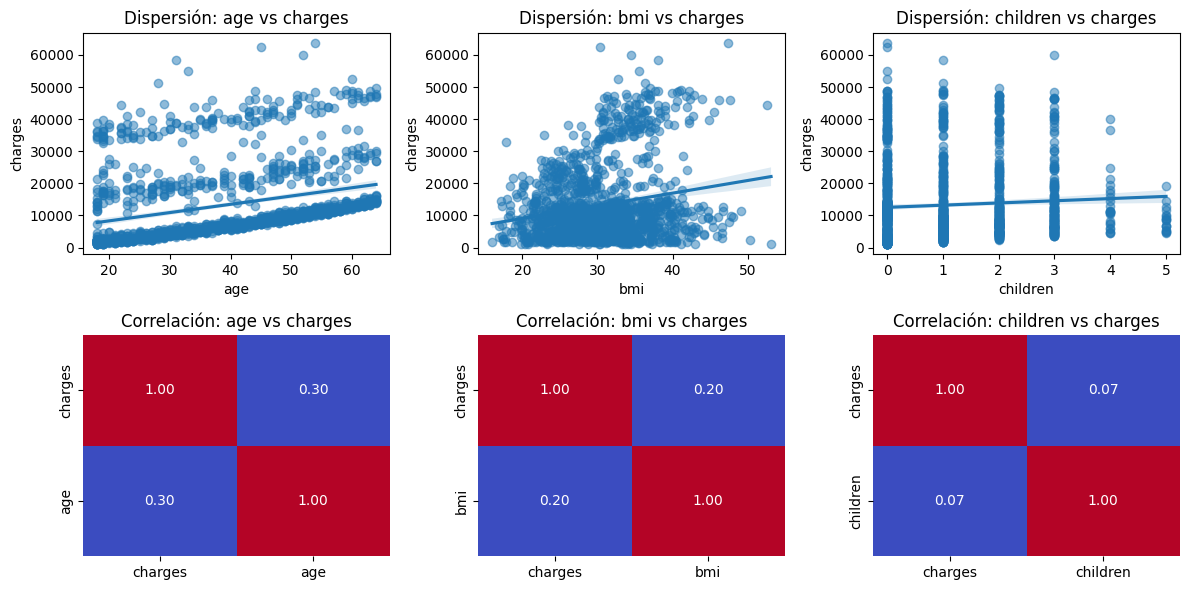

In [131]:

import matplotlib.pyplot as plt
import seaborn as sns
import math

def graficar_dispersiones_y_heatmaps(df, columnas, target_col, n_columnas=3):

    # Verificar que la columna target exista en el DataFrame
    if target_col not in df.columns:
        raise KeyError(f"La columna '{target_col}' no existe en el DataFrame.")

    # Calcular el número de filas necesarias
    n = len(columnas)
    n_filas = math.ceil(n / n_columnas)

    # Crear la figura con el número dinámico de filas y columnas
    fig, axis = plt.subplots(n_filas * 2, n_columnas, figsize=(n_columnas * 4, n_filas * 6))

    # Aplanar el array de ejes para facilitar la iteración
    axis = axis.flatten()

    # Graficar los gráficos de dispersión y heatmaps
    for i, col in enumerate(columnas):
        # Gráfico de dispersión
        sns.regplot(ax=axis[i], data=df, x=col, y=target_col, scatter_kws={"alpha": 0.5})
        axis[i].set_title(f'Dispersión: {col} vs {target_col}', fontsize=12)

        # Heatmap de correlación
        sns.heatmap(df[[target_col, col]].corr(), annot=True, fmt=".2f", ax=axis[i + n_columnas * n_filas], cbar=False, cmap="coolwarm")
        axis[i + n_columnas * n_filas].set_title(f'Correlación: {col} vs {target_col}', fontsize=12)

    # Ocultar los ejes vacíos
    for j in range((n_filas * 2) * n_columnas):
        if j >= n + n_filas * n_columnas:
            axis[j].axis("off")

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

# Llamar a la función con las columnas numéricas y la columna target factorizada ("y_n")
graficar_dispersiones_y_heatmaps(datos, num_cols, "charges")


In [122]:
#factorizar todas las variables categoricas

import json
import pandas as pd

# Supongamos que cat_cols es una lista de columnas categóricas
columns_to_factorize = cat_cols

# Diccionario para guardar todos los mapeos en uno solo
all_factorization_mappings = {}

# Asegurarse de que data_limpia sea una copia explícita del DataFrame original
data_limpia = data_limpia.copy()

# Loop para factorizar cada columna y guardar los mapeos
for column in columns_to_factorize:
    # Factorizar la columna y guardar los mapeos
    data_limpia[column], mapping = pd.factorize(data_limpia[column])
    all_factorization_mappings[column] = dict(enumerate(mapping))

# Mostrar todos los mapeos
for column, mapping in all_factorization_mappings.items():
    print(f"Reglas para '{column}': {mapping}")

# Guardar todos los mapeos en un solo archivo JSON
with open("../models/factorization_mappings.json", "w") as f:
    json.dump(all_factorization_mappings, f, indent=4)

Reglas para 'sex': {0: 0, 1: 1}
Reglas para 'smoker': {0: 0, 1: 1}
Reglas para 'region': {0: 0, 1: 1, 2: 2, 3: 3}


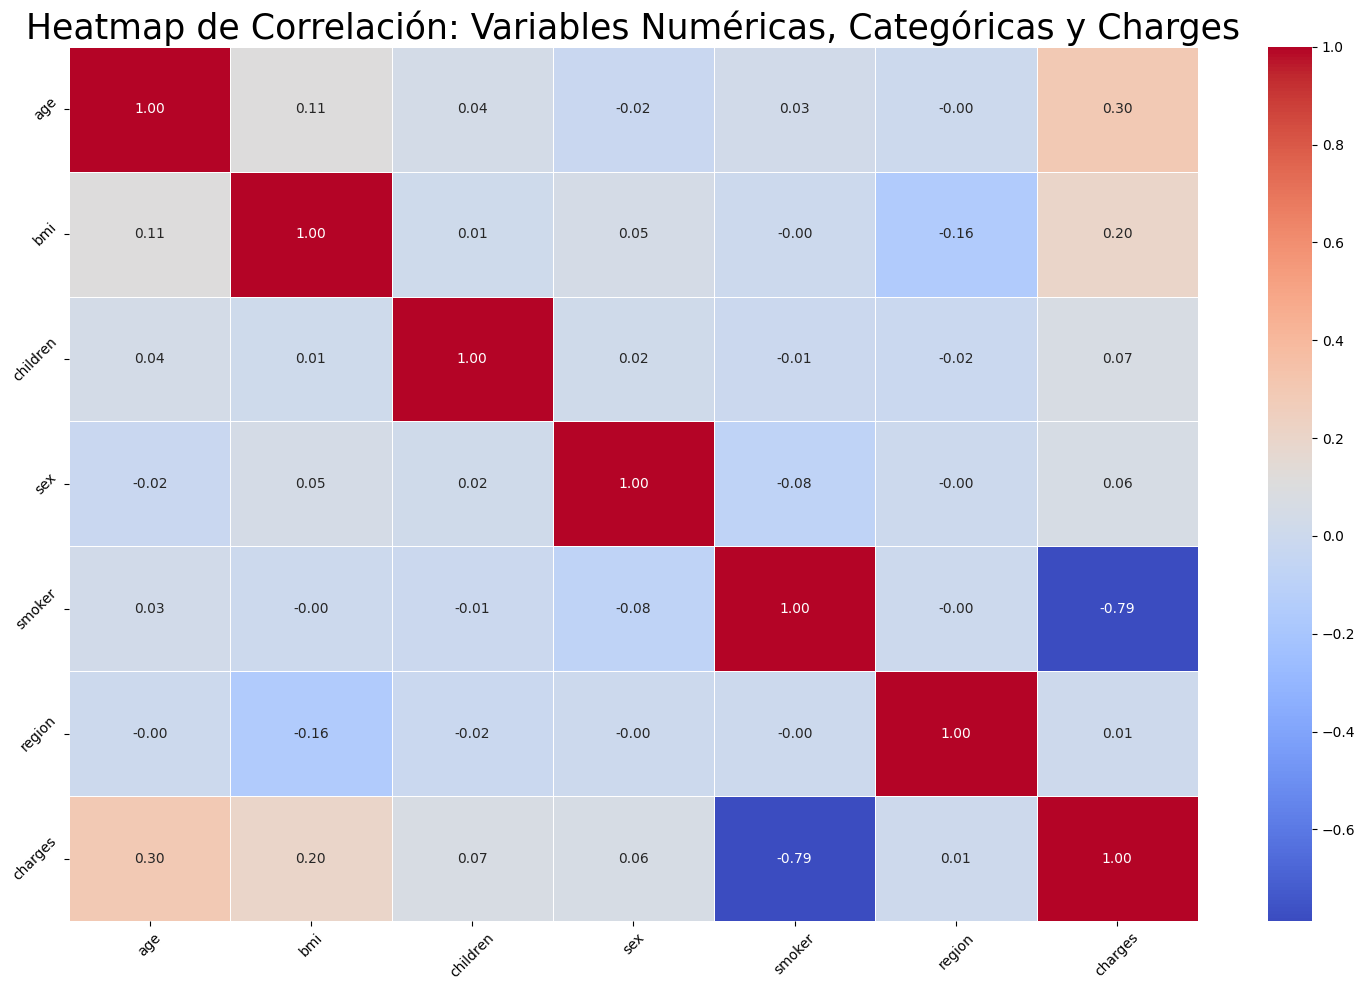

In [135]:
# Convertir num_cols y cat_cols a listas de Python
num_cols_list = list(num_cols)
cat_cols_list = list(cat_cols)

# Combinar las columnas numéricas originales, las columnas factorizadas y la variable objetivo "charges"
columnas_combinadas = num_cols_list + cat_cols_list +  ["charges"]

# Verificar que las columnas existan en el DataFrame
for col in columnas_combinadas:
    if col not in data_limpia.columns:
        print(f"Advertencia: La columna '{col}' no existe en el DataFrame.")

# Crear la figura
plt.figure(figsize=(15, 10))

# Heatmap de correlación
sns.heatmap(data_limpia[columnas_combinadas].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Título y etiquetas
plt.title("Heatmap de Correlación: Variables Numéricas, Categóricas y Charges", fontsize=25)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.yticks(rotation=45)  # Rotar etiquetas del eje y

# Ajustar el layout
plt.tight_layout()

# Mostrar el heatmap
plt.show()

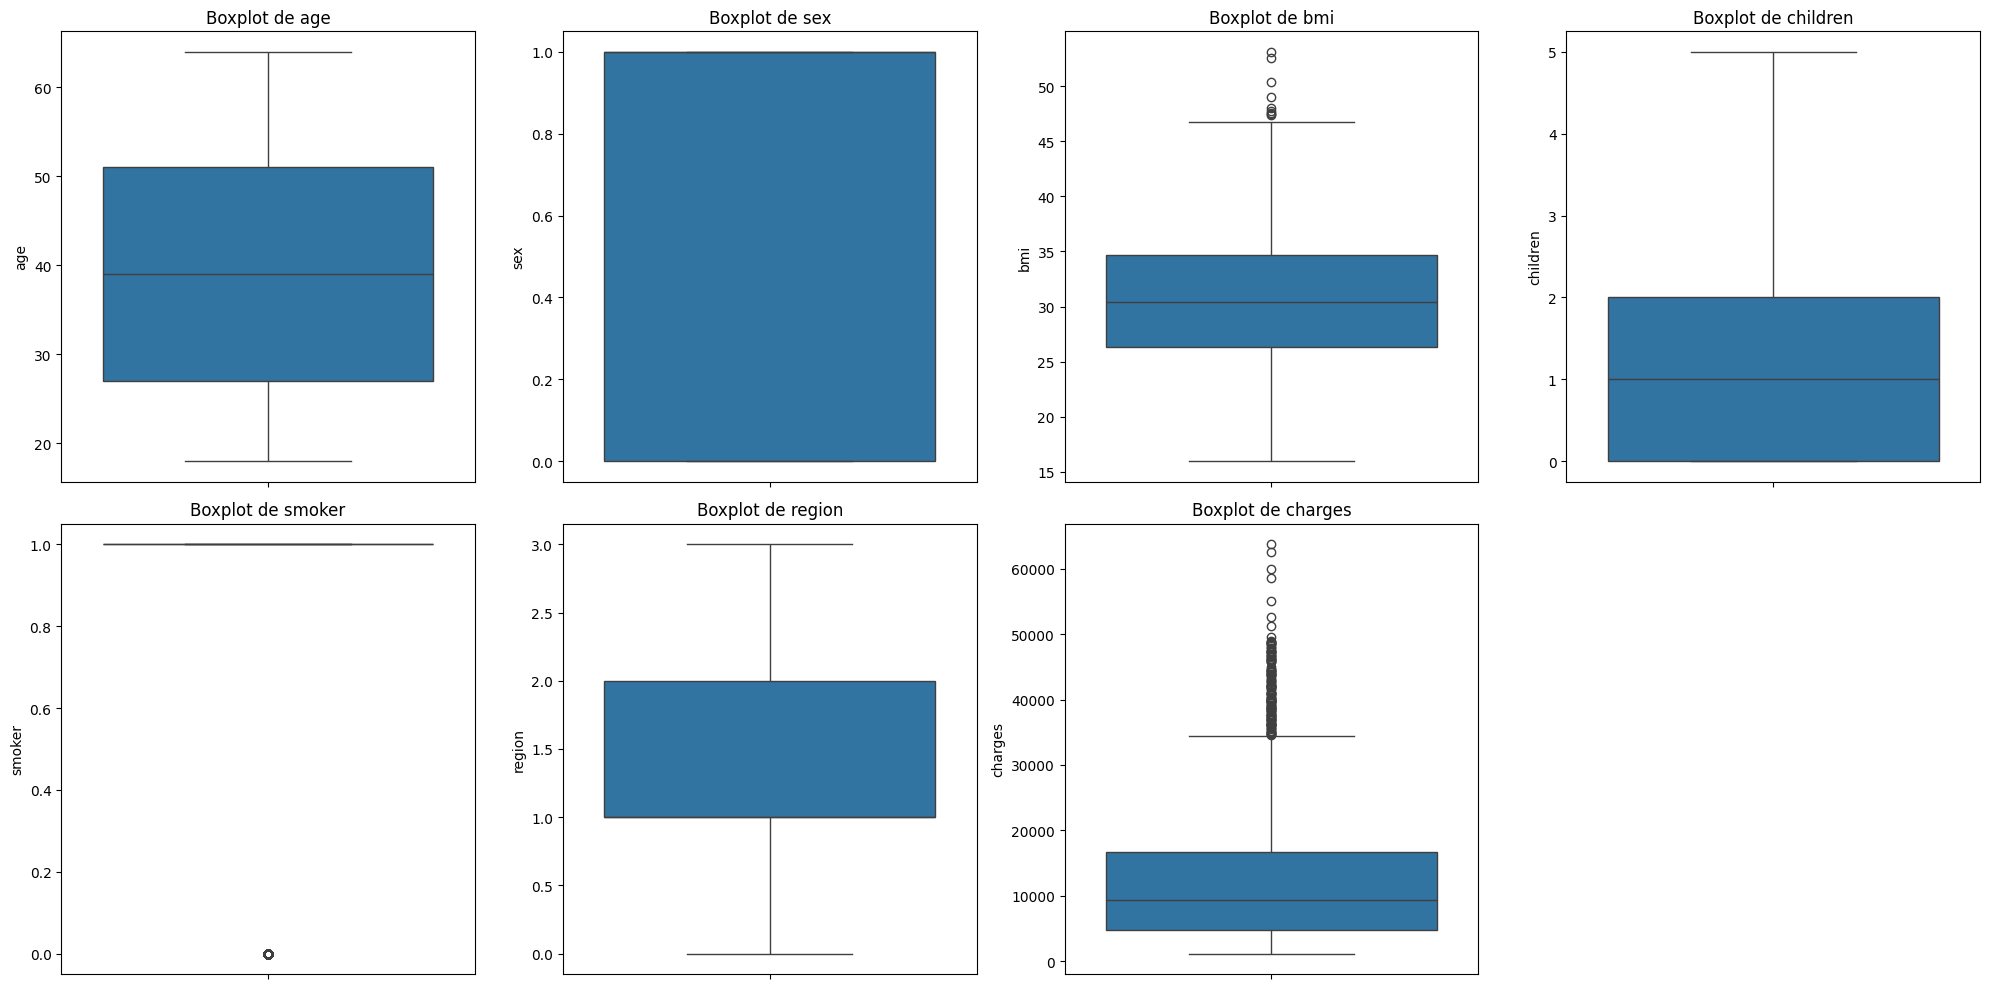

In [138]:
def generar_boxplots_automaticos(df):
   
    # Filtrar las columnas numéricas del DataFrame, como ya esta normalizado, son todas. 
    columnas = df.columns

    n_columnas = 4
    n_filas = (len(columnas) + n_columnas - 1) // n_columnas  # Redondeo hacia arriba

    # Crear la figura y los ejes para los subgráficos
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 5, n_filas * 5))

    # Aplanar el array de ejes para facilitar la iteración
    axis = axis.flatten()

    # Graficar un boxplot para cada columna del DataFrame
    for i, col in enumerate(columnas):
        sns.boxplot(ax=axis[i], data=df, y=col)
        axis[i].set_title(f'Boxplot de {col}')

    # Si hay menos gráficos que subgráficos, ocultar los ejes restantes
    for j in range(i + 1, len(axis)):
        axis[j].axis('off')

    # Ajustar el layout para evitar que los gráficos se sobrepongan
    plt.tight_layout()
    plt.show()

generar_boxplots_automaticos(data_limpia)

In [147]:
import os 

total_data_con_outliers = data_limpia.copy() 
total_data_sin_outliers = data_limpia.copy()

col_con_outliers = ["bmi"]

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in col_con_outliers:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../models/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict, f)

outliers_dict

{'bmi': [np.float64(13.7), np.float64(47.290000000000006)]}

In [148]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [150]:
#SPLIT

from sklearn.model_selection import train_test_split

# Obtener las columnas numéricas
num_variables = total_data_con_outliers.copy().drop("charges", axis=1).columns.tolist()

# Dividir el conjunto de datos en train y test
X_con_outliers = total_data_con_outliers.drop("charges", axis=1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("charges", axis=1)[num_variables]
y = total_data_con_outliers["charges"]

# Dividir los datos con outliers
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size=0.2, random_state=42)

# Dividir los datos sin outliers
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size=0.2, random_state=42)

# Guardar los datasets en archivos Excel
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index=False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index=False)
y_train.to_excel("../data/processed/y_train.xlsx", index=False)
y_test.to_excel("../data/processed/y_test.xlsx", index=False)

# Mostrar las primeras filas del conjunto de entrenamiento con outliers
X_train_con_outliers.head()

,age,sex,bmi,children,smoker,region
560,46,0,19.95,2,1,2
1285,47,0,24.32,0,1,3
1142,52,0,24.86,0,1,1
969,39,0,34.32,5,1,1
486,54,0,21.47,3,1,2


In [151]:
# ESCALADO

from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,sex,bmi,children,smoker,region
560,0.472227,-1.024602,-1.756525,0.734336,0.508747,0.456116
1285,0.543313,-1.024602,-1.033082,-0.911192,0.508747,1.353256
1142,0.898745,-1.024602,-0.943687,-0.911192,0.508747,-0.441024
969,-0.025379,-1.024602,0.622393,3.202629,0.508747,-0.441024
486,1.040918,-1.024602,-1.504893,1.557100,0.508747,0.456116


In [152]:
#NORMALIZADO

from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,sex,bmi,children,smoker,region
560,0.608696,0.0,0.107345,0.4,1.0,0.666667
1285,0.630435,0.0,0.224913,0.0,1.0,1.000000
1142,0.739130,0.0,0.239440,0.0,1.0,0.333333
969,0.456522,0.0,0.493947,1.0,1.0,0.333333
486,0.782609,0.0,0.148238,0.6,1.0,0.666667


In [153]:
print(X_train_con_outliers_scal.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64
